Rita Ghilardi

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier, plot_tree 

# Assignment 1 

Welcome to the assignment! 

You will have to implement regression and classification algorithms, applying these methods to the topics of agriculture, food, water, and health. More precisely, you will try to:
- predict crop yields using data on weather and fertilizer use;
- predict the potability of water using data on the mineral and micro-organisms content of water.

Once you are done you have to submit your notebook here: 
[https://moodle.epfl.ch/mod/assign/view.php?id=1244180](https://moodle.epfl.ch/mod/assign/view.php?id=1244180)

If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repository for updates.

Good luck!

## Linear regression: predicting crop yields

In 2020, between 720 million and 811 million persons worldwide were suffering from hunger (see [SDG Goal 2](https://www.un.org/sustainabledevelopment/hunger/) Zero Hunger). Given the ongoing growth of the world population, it is imperative to comprehend crop yield at a global level in order to tackle food security issues and mitigate the effects of climate change.

The Agricultural yield depends on weather conditions (rain, temperature, etc) and fertilizers use. Having precise information regarding the historical crop yield is critical for making informed decisions regarding agricultural risk management and future projections.

Some E4S publications on the topic of food:
- [Threats to Nitrogen Fertilizer, Opportunities to Cultivate Sustainable Practices?](https://e4s.center/resources/reports/threats-to-nitrogen-fertilizer-opportunities-to-cultivate-sustainable-practices/)
- [True cost of food as a lever to transform the Swiss food system](https://e4s.center/resources/reports/true-cost-of-food-as-a-lever-to-transform-the-swiss-food-system/)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Sustainable_Development_Goal_02ZeroHunger.svg/800px-Sustainable_Development_Goal_02ZeroHunger.svg.png' width="200">

We will use data obtained from the [FAO](http://www.fao.org/home/en/) (Food and Agriculture Organization) and [World Data Bank](https://data.worldbank.org/), and gathered in the [Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset).

Our goal is to predict the crop yields using the temperature, rain fall, and type of crops.


### Question 1: Load and Discover the dataset

- Load the data in a dataframe. The url link is provided below. Display the first 10 observations and the types of data **1 point**

In [2]:
url_yield = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/yield_df.csv'

# Create DataFrame and display first 10 observations
df_yield = pd.read_csv(url_yield) 
display(df_yield.head(10))

# Print data types 
print("\nThese are the variables of the dataset and the corresponding types:\n", df_yield.dtypes)

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                           1485   
1  Albania     Potatoes  1990        66667                           1485   
2  Albania  Rice, paddy  1990        23333                           1485   
3  Albania      Sorghum  1990        12500                           1485   
4  Albania     Soybeans  1990         7000                           1485   
5  Albania        Wheat  1990        30197                           1485   
6  Albania        Maize  1991        29068                           1485   
7  Albania     Potatoes  1991        77818                           1485   
8  Albania  Rice, paddy  1991        28538                           1485   
9  Albania      Sorghum  1991         6667                           1485   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37  
5              121.0     16.37  
6              121.0     15.36  
7              121.0     15.36  
8              121.0     15.36  
9              121.0     15.36


These are the variables of the dataset and the corresponding types:
 Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year      int64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object


The DataFrame contains **7 different variables**, 2 of them are classified as **objects** while the remaining are quantitative variables (3 as **integers** and 2 as **floats**). It can be noticed that variable "Year" is considered as an integer number, while normally it should be transformed into a datetime format. However, since this particular variable is not used for the regression purposes, we won't change its type.  

- Print the list of countries ('Area') and years available in the dataset **1 point**

In [3]:
# Print list of countries 
countries = df_yield["Area"].to_list()
print("These are the different countries available in the dataset: \n", np.unique(countries))

# Print list of years
years = df_yield["Year"].to_list()
print("\nThese are the different years available in the dataset:\n", np.unique(years))

These are the different countries available in the dataset: 
 ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri

- Print the list of 'Item' in the dataset. You should obtain a list of 10 crops, which are among the most consumed in the world **1 point**

In [4]:
# Print list of "Item", i.e. the different types of crops
crops = df_yield["Item"].to_list()
print("These are the different types of crop available in the dataset: \n", np.unique(crops))

These are the different types of crop available in the dataset: 
 ['Cassava' 'Maize' 'Plantains and others' 'Potatoes' 'Rice, paddy'
 'Sorghum' 'Soybeans' 'Sweet potatoes' 'Wheat' 'Yams']


- Display summary statistics for the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'. How many observations do we have? **1 point**

*Hint:* You can extract the columns 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' in a new dataframe since we will reuse it in the following questions

In [5]:
# Extract columns in a new DataFrame
sub_yield_df = df_yield.loc[:,["hg/ha_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes","avg_temp"]]

# Summary statistics
display(sub_yield_df.describe().round(decimals = 3))
print("\nThe DataFrame contains", len(sub_yield_df), "observations.")

hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  \
count    28242.000                      28242.000          28242.000   
mean     77053.332                       1149.056          37076.909   
std      84956.613                        709.812          59958.785   
min         50.000                         51.000              0.040   
25%      19919.250                        593.000           1702.000   
50%      38295.000                       1083.000          17529.440   
75%     104676.750                       1668.000          48687.880   
max     501412.000                       3240.000         367778.000   

        avg_temp  
count  28242.000  
mean      20.543  
std        6.312  
min        1.300  
25%       16.702  
50%       21.510  
75%       26.000  
max       30.650


The DataFrame contains 28242 observations.


As also highlighted in row "count", the DataFrame contains **28242 observations**. What's interesting to note from the table above is the different scales of the variables taken into consideration. This means that the variables have **different ranges of values**, as it can be observed from the "mean", "min", "max" and interquartile ranges columns. Given these differences, it will be fundamental to **rescale** those variables for regression purposes.

- Display a heatmap of the correlation matrix between the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

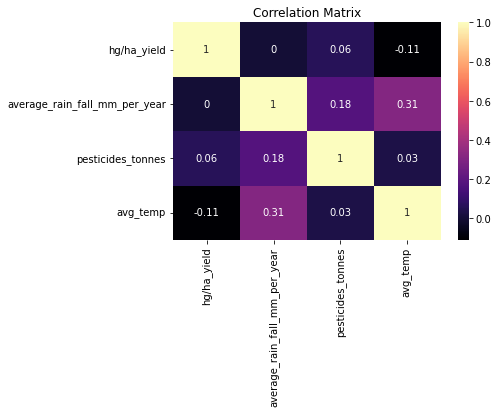

In [6]:
# Correlation matrix
sns.heatmap(sub_yield_df.corr().round(decimals = 2), annot = True, cmap = "magma")

plt.title("Correlation Matrix")
plt.show()

The correlation matrix above is an intutive graphical representation of the **correlation** between each **pair of variables** in our dataset. We can observe a **weak positive correlation** of 0.31 between the **average temperature** and the **average rainfall**, and a **weak negative correlation** of -0.11 between the **crop yield** and **average temperature**, suggesting that crop yield increases with reductions in the average temperature.

- Create a boxplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

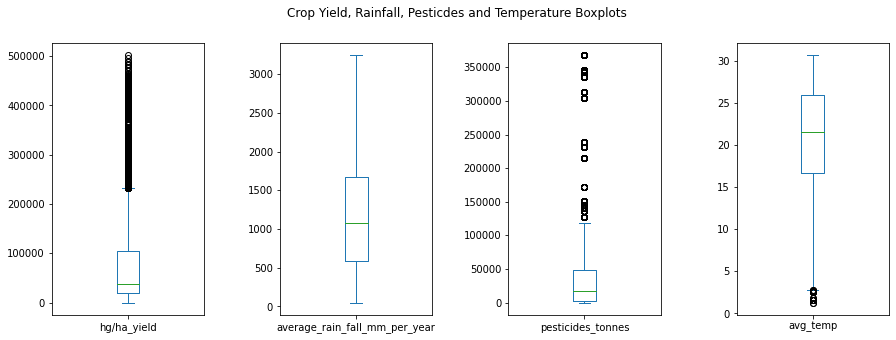

In [7]:
# Boxplot
sub_yield_df.plot( kind="box", subplots = True, sharey = False, figsize = (15, 5))

# Increase spacing between subplots
plt.subplots_adjust(wspace= 0.5) 

plt.suptitle("Crop Yield, Rainfall, Pesticdes and Temperature Boxplots")
plt.show()

The boxplots above provide a graphical representation of the distribution of each variable. What is worth noting, is that the **crop yield** and **pesticides** are **skewed on the right**, as most of the observations lies near zero.  

- Create a pairplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

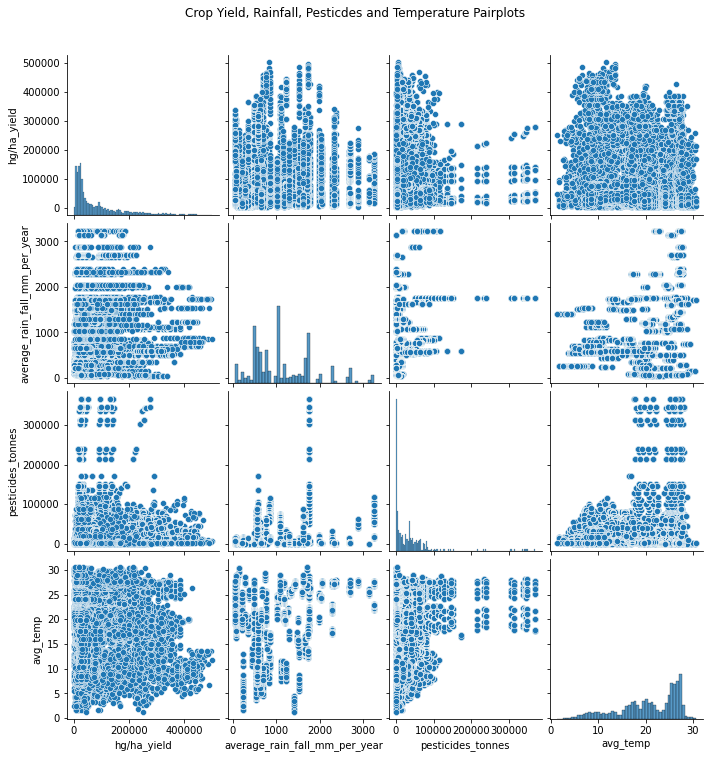

In [8]:
# Pairplot
sns.pairplot(sub_yield_df) 

title = plt.suptitle("Crop Yield, Rainfall, Pesticdes and Temperature Pairplots")
title.set_position([.5, 1.05])  # Set the position of the title
plt.show()

Upon observing the pairplots it appears that there is **no clear linear relationship** between the variables, as it is difficult to divide the observations with a straight line. This could have important implications for any regressions that we perform on the dataset. Specifically, linear regression assumes that there is a linear relationship between the predictor and response variables. When this assumption is violated, the resulting regression model may be inaccurate and have poor predictive power.

- Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

### Question 2: Multivariate regression 

We will try to predict the crop yields (column 'hg/ha_yield') using as features: 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'

- Extract your features and outcome **1 point**

In [9]:
# Extract columns in a DataFrame
yield_mult_an = df_yield.loc[:,["hg/ha_yield", "Item", "average_rain_fall_mm_per_year", "pesticides_tonnes","avg_temp"]]

# Select features and outcome variable 
X = yield_mult_an[["Item", "average_rain_fall_mm_per_year", "pesticides_tonnes","avg_temp"]]
y = yield_mult_an[["hg/ha_yield"]]

- Split between training and test set **1 point**

*Note*: Use as option: `test_size=0.2`, `random_state=42`, `shuffle=True`

In [10]:
# Split dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

- Encode the column 'Item' using `LabelEncoder` **1 point**

*Note*: After training your encoder, you need to transform the values of both the training and test set

In [11]:
print("Before data transformation: \n", (X_train[["Item"]]))

# Extract the column of interest
yield_it_enc = X_train[["Item"]].values.ravel()
yield_it_enc_test = X_test[["Item"]].values.ravel()

# Define the encoder
label_encoder = LabelEncoder()

# Fit the encoder
label_encoder.fit(yield_it_enc)

# Transform the train and the test set
X_train = X_train.assign(Item = label_encoder.transform(yield_it_enc))
X_test = X_test.assign(Item = label_encoder.transform(yield_it_enc_test))
print("After data transformation: \n", X_train[["Item"]])

Before data transformation: 
                        Item
5493                Sorghum
10969              Soybeans
2001                Cassava
22157              Potatoes
311          Sweet potatoes
...                     ...
21575           Rice, paddy
5390   Plantains and others
860                Potatoes
15795        Sweet potatoes
23654        Sweet potatoes

[22593 rows x 1 columns]
After data transformation: 
        Item
5493      5
10969     6
2001      0
22157     3
311       7
...     ...
21575     4
5390      2
860       3
15795     7
23654     7

[22593 rows x 1 columns]


The objective of the previous operation is to assign a number to each type of crop yield available in the **categorical variable "Item"**. In the output above we can see the observations in the training set before and after the transformation. For instance, "Sweet potatoes" type has been assigned the number 7, while "Sorghum" number 5.

In the code below instead, we are rescaling all the features of our dataset with the aim of bringing them all to the same scale and avoiding any dominance by a particular feature during the model fitting process. 

- Rescale your features using `MinMaxScaler` **1 point**

In [12]:
# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler and transform the train and the test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display results
print("After data transformation:\n", X_train[:10, :] )

After data transformation:
 [[5.55555556e-01 4.86986516e-01 2.25557290e-03 8.19761499e-01]
 [6.66666667e-01 3.23612418e-01 1.92482877e-01 8.38500852e-01]
 [0.00000000e+00 3.89150204e-01 1.31750690e-03 8.35093697e-01]
 [3.33333333e-01 1.38915020e-01 4.60494153e-02 7.65247019e-01]
 [7.77777778e-01 3.00721229e-01 1.08652514e-04 7.87393526e-01]
 [4.44444444e-01 3.23612418e-01 9.60959161e-02 8.69846678e-01]
 [6.66666667e-01 4.49670743e-01 1.88078155e-03 5.16865417e-01]
 [6.66666667e-01 1.51458137e-01 1.14659807e-01 6.48381601e-01]
 [8.88888889e-01 5.27124490e-01 9.88166882e-03 4.12265758e-01]
 [5.55555556e-01 1.90028222e-01 7.83886016e-03 6.81431005e-01]]


- Build and train a multivariate linear regression model **1 point**

In [13]:
# Set up Multivariate Linear Regression model
model_lin_reg = LinearRegression()

# Train the model
model_lin_reg.fit(X_train, y_train)

LinearRegression()

- What is the $R^2$, mean absolute error, and mean square error on the training set? On the test set? What do you think? **1 point**

In [14]:
# Make predictions
predictions = model_lin_reg.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = model_lin_reg.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f}.")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f}." )

MAE test set: 62446.00; MAE training set: 62188.46;
MSE test set: 6695410825.85; MSE training set: 6672605138.11.
R² test set: 0.08; R² training set: 0.07.


The **Mean Absolute Error** (MAE) of the **test set** is **62446**, which indicates that, on average, the model's predictions are 62,446.00 off from the test set's actual values. The **training set's MAE** is **62188.46**, which is comparable to the test set's MAE and shows that the model is **not overfitting** the training set's data.

The **test set's Mean Squared Error** (MSE) is an extremely high value of **6695410825.85**. This shows that there is a significant difference between the model's predictions and the test set's actual values.
The model is **not overfitting** to the training set of data, as shown by the **MSE** on the **training set**, which is **6672605138.11**.

Both the **R²** of the **test** and **training sets** (0.08 and 0.07, respectively) are very low values, indicating that the model is not able to explain a significant amount of variance in the given set. 

Given these considerations, it appears that the Multivariate Regression may **not be a good model** for the data at hand. The low R² values indicate that the model is unable to adequately represent the underlying relationships between the predictors and the response variable, while the high MAE and MSE values show that the model's predictions are not accurate.

### Question 3: Polynomial features regression

We will try to improve the quality of our prediction using `PolynomialFeatures`.

- Write a function that is using as inputs the degree of polynomial features (an integer), the training and test set (for your features and outcome), and return the $R^2$, mean absolute error, and mean square error on the training and on the set of a polynomial feature regression **3 points**

*Hint:* You do not need to include in your function the splitting, encoding and scaling since we will reuse the ones set created before (as before). Your function should transform your training and test set to integrate polynomial features, then build and train your model, before calculating the various error metrics.

In [15]:
def polynomial_regression(degrees, X_train_set, X_test_set, y_train_set, y_test_set):

  """ This function takes as arguments the degree of polynomial features 
  expressed as an integer and the train and test sets of the features and 
  outcome variable. The function returns the MAE, MSE and R^2 of the train 
  and test sets applying a polynomial features regression."""
  
  poly = PolynomialFeatures(degrees)
  
  # Transform training and test set
  X_train_poly = poly.fit_transform(X_train_set)
  X_test_poly = poly.transform(X_test_set)

  # Set up the Polynomial features model
  model_poly = LinearRegression(fit_intercept = False) 

  # Fit 
  model_poly.fit(X_train_poly, y_train_set)

  # Make predictions
  predictions = model_poly.predict(X_test_poly)

  # Compute the MAE, the MSE and the R^2 on the test set
  mae_test = mean_absolute_error(y_test_set, predictions)
  mse_test = mean_squared_error(y_test_set, predictions)
  r2_test = r2_score(y_test_set, predictions)

  # Compute the MAE, the MSE and the R^2 on the training set
  predictions_train = model_poly.predict(X_train_poly)
  mae_train = mean_absolute_error(y_train_set, predictions_train)
  mse_train = mean_squared_error(y_train_set, predictions_train)
  r2_train = r2_score(y_train_set, predictions_train)

  # Return metrics
  return mae_test, mse_test, r2_test, mae_train, mse_train, r2_train

- What are the the $R^2$, mean absolute error, and mean square error on the training and on the set of a polynomial features regression with degree = 3? With degree = 7? **1 point**

In [16]:
# Call the function previously created with 3 degrees
three_degrees = polynomial_regression(3, X_train, X_test, y_train, y_test)
print("Polynomial features regression with 3 degrees:")
print(f"MAE test set: {three_degrees[0]:0.2f}; MAE training set: {three_degrees[3]:0.2f}.")
print(f"MSE test set: {three_degrees[1]:0.2f}; MSE training set: {three_degrees[4]:0.2f}.")
print(f"R\u00b2 test set: {three_degrees[2]:0.3f}; R\u00b2 training set: {three_degrees[5]:0.3f}.\n" )

# Call the function previously created with 7 degrees
seven_degrees = polynomial_regression(7, X_train, X_test, y_train, y_test)
print("Polynomial features regression with 7 degrees:")
print(f"MAE test set: {seven_degrees[0]:0.2f}; MAE training set: {seven_degrees[3]:0.2f}.")
print(f"MSE test set: {seven_degrees[1]:0.2f}; MSE training set: {seven_degrees[4]:0.2f}.")
print(f"R\u00b2 test set: {seven_degrees[2]:0.3f}; R\u00b2 training set: {seven_degrees[5]:0.3f}." )

Polynomial features regression with 3 degrees:
MAE test set: 57230.77; MAE training set: 57257.29.
MSE test set: 5640626612.97; MSE training set: 5649953904.49.
R² test set: 0.222; R² training set: 0.216.

Polynomial features regression with 7 degrees:
MAE test set: 28960.87; MAE training set: 28256.73.
MSE test set: 1554394778.20; MSE training set: 1508477898.62.
R² test set: 0.786; R² training set: 0.791.


In [17]:
# Call the function previously created with 4 degrees for comparison in Question 5
four_degrees = polynomial_regression(4, X_train, X_test, y_train, y_test)

# Store results in a dictionary
results_4d = {"Model": "Polynomial Features", "Degrees": "4", "MAE Test": four_degrees[0], 
                   "MAE Train": four_degrees[3], "MSE Test": four_degrees[1],
                   "MSE Train": four_degrees[4], "R\u00b2 Test" : four_degrees[2], 
                   "R\u00b2 Train": four_degrees[5]}

Compared to the previous Multivariate Regression model, the **Polynomial Feature Regressions** are generally **better**. In fact, the polynomial features regression models have **lower MAE** and **MSE** on both the training and test sets, and **higher R²** on both the training and test sets. 

Focusing on the two Polynomial Features Regression models, the one with **7 degrees** generally **performs better** than the one with 3 degrees. The model with 7 degrees has significantly **lower MAE** and **MSE** on both the training and test sets, and a **higher R²** on both the training and test sets. This suggests that the model with 7 degrees is able to better capture the underlying relationships between the predictors and the response variable. 

However, we should be careful at increasing the degree of the model, as it can lead to **overfitting**. In this specific case, the errors of the train and test set of the polynomial model with 7 degrees are very similar in magnitude and they both have improved from the model with lower degrees, therefore overfitting is unlikely. 

- Plot the evolution of the MSE on the training set for a polynomial feature regression model when the degree goes from 2 to 10. On the same figure, plot the MSE on the test set for a polynomial feature regression model, when the degree goes from 2 to 10. Which degree would you choose and why? **2 points**

In [18]:
def calculate_mse():

  """This function iterates over a list of degrees computing the corresponding
  polynomial regression. The function returns a DataFrame which exhibits for 
  each degree the corresponding train and test MSEs."""
  
  train_mse = [] # Stores train MSEs 
  test_mse = []  # Stores test MSEs
  degrees = [i for i in range(2,11)] # Number of degrees, from 2 to 10 

  for number in degrees:
    output = polynomial_regression(number, X_train, X_test, y_train, y_test)
    train_mse += [output[4]]
    test_mse += [output[1]] 

  return pd.DataFrame({"Degree": degrees, "Train MSE": train_mse, "Test MSE": test_mse})

# Call function
df_poly_features = calculate_mse()

# Plot evolution of MSEs given the different degrees
fig = px.line(df_poly_features, x = "Degree", y = ["Train MSE", "Test MSE"], 
              title = "Evolution of MSE on Training and Test Sets",
              labels = {"value": "MSE", "degree": "Degree"}, 
              color_discrete_sequence = ["blue", "green"])
fig.show()

The optimal degree for the Polynomial Regression model can be determined by the plot generated by the function above. Specifically, the plot shows the evolution of the train and test MSEs given the different degrees. As shown, the **test MSE** initially **decreases** as the **degree increases**, which suggests that the model is improving its fit to the data. However, as we continue to increase the degree, the **test MSE** starts to **increase again**, while the train MSE continues to decrease. This behaviour suggests that at higher degrees the model is **overfitting**, and it occurs when it becomes too complex and start to fit the noise in the data rather than the underlying pattern. 

The approach used to determine the optimal degree of the Polynomial Regression model is the **elbow method**, which is commonly employed to determine the number of clusters in clustering algorithms. In this case, the elbow method involves plotting the train and test MSEs against the degree and identifying the "elbow" point, which corresponds to the degree where the test MSE **starts to level off**, indicating that the additional complexity of the model is **not resulting in a significant improvement** in performance. We can in fact observe that the elbow point occurs at **degree 6**. This suggests that a Polynomial Regression with 6 degrees provides a good balance between **model complexity** and **fit** to the data.

Although the **lowest test MSE** is achieved at **9 degrees**, it is important to consider the trade-off between model complexity and fit to the data. A model with too many degrees may fit the noise in the data and perform poorly on new data. 

It is also worth remembering that the polynomial features are a type of **feature engineering**, which means that new input features are created based on the existing features of the regression. For instance, a degree of 3 will add two new variables for each input variable, which is why typically a small degree is used, such as **2** or **3***. Therefore, as the number of degrees increases, the number of features will rise exponentially, increasing the model complexity too. 

***Reference**: James, Gareth, et al. "An introduction to statistical learning: with applications in R, ser. Springer texts in statistics." (2013). 

### Question 4: Ridge and cross-validation

- Build, train, and evaluate a polynomial features regression model, with Ridge regularization, and cross validation. For number of degree, select the one that you picked before. How does your new model compares to your previous one? **3 points**

In [19]:
# Call the function previously created with 6 degrees for comparison purposes
six_degrees = polynomial_regression(6, X_train, X_test, y_train, y_test)

# Store results in a dictionary
results_pol6 = {"Model": "Polynomial Features","Degrees": "6", "MAE Test": six_degrees[0], 
                "MAE Train": six_degrees[3], "MSE Test": six_degrees[1],
                "MSE Train": six_degrees[4], "R\u00b2 Test" : six_degrees[2], 
                "R\u00b2 Train": six_degrees[5]}

In [20]:
# Set up Polynomial Features model
poly = PolynomialFeatures(6)
  
# Transform our training and test set
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Set up the model with Ridge regulization and cross validation
ridge_cv_model = RidgeCV(cv = 5, fit_intercept = False)

# Use fit
ridge_cv_model.fit(X_train_poly, y_train)

# Make predictions
predictions = ridge_cv_model.predict(X_test_poly)

# Compute the MAE, the MSE and the R^2 on the test set
mae_ridge_cv = mean_absolute_error(y_test, predictions)
mse_ridge_cv = mean_squared_error(y_test, predictions)
r2_ridge_cv = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = ridge_cv_model.predict(X_train_poly)
mae_train_ridge_cv = mean_absolute_error(y_train, predictions_train)
mse_train_ridge_cv = mean_squared_error(y_train, predictions_train)
r2_train_ridge_cv = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae_ridge_cv:0.2f}; MAE training set: {mae_train_ridge_cv:0.2f};")
print(f"MSE test set: {mse_ridge_cv:0.2f}; MSE training set: {mse_train_ridge_cv:0.2f};")
print(f"R\u00b2 test set: {r2_ridge_cv:0.2f}; R\u00b2 training set: {r2_train_ridge_cv:0.2f};" )

# Store results in a dictionary
results_ridgecv = {"Model": "Polynomial Ridge CV", "Degrees": "6", "MAE Test": mae_ridge_cv, 
                   "MAE Train": mae_train_ridge_cv, "MSE Test": mse_ridge_cv,
                   "MSE Train": mse_train_ridge_cv, "R\u00b2 Test" : r2_ridge_cv, 
                   "R\u00b2 Train": r2_train_ridge_cv}

MAE test set: 52789.85; MAE training set: 53170.49;
MSE test set: 4844230610.47; MSE training set: 4888983675.24;
R² test set: 0.33; R² training set: 0.32;


In [21]:
# Compare results in a Dataframe 
results_df = pd.DataFrame([results_ridgecv, results_pol6]).set_index("Model").round(decimals = 3)
results_df

Degrees   MAE Test  MAE Train      MSE Test     MSE Train  \
Model                                                                           
Polynomial Ridge CV       6  52789.852  53170.494  4.844231e+09  4.888984e+09   
Polynomial Features       6  31857.259  31233.637  1.901135e+09  1.863231e+09   

                     R² Test  R² Train  
Model                                   
Polynomial Ridge CV    0.332     0.322  
Polynomial Features    0.738     0.742

By comparing the **Polynomial Ridge model with cross-validation** with the "standard" **Polynomial Features** we notice that the latter model **outperforms** the former in terms of **MAE** and **MSE** values on both **training** and **test sets**. This suggests in fact that the Polynomial Features model has a better fit to the data than the Polynomial Ridge CV model.

The "standard" Polynomial Features model is also **better** than the other model in terms of **R²** both on the train and test sets (0.742 and 0.738 against 0.322 and 0.332, respectively).

It is worth noting that the Ridge model with Polynomial Features is a regularized version of the Polynomial Regression model. By including a penalty term to the loss function, regularization uses a method to prevent overfitting. The penalty term causes the coefficients to converge to zero, which can assist simplify the model and keep it from fitting data noise. The loss function can become dominated by the penalty term if the regularization parameter (i.e. alpha) is too high, and the resulting model may not adequately fit the data.

### Question 5: One-Hot encoding

We will check how the encoding influenced our results.

- Split your original dataset between training and test set (using the same parameters as in Question 2). This time, encode the column 'Item' using `OneHotEncoder`. Finally, rescale your features. **1 point**

In [22]:
# Split dataset in training and test set
X_train_he, X_test_he, y_train_he, y_test_he = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [23]:
# Define the encoder
ohe = OneHotEncoder()

# Fit the encoder
ohe.fit(X_train_he[["Item"]])

# Transform the train and the test set
train_items_encoded = ohe.transform(X_train_he[["Item"]])
test_items_encoded = ohe.transform(X_test_he[["Item"]])

# Convert encoded data to a dense numpy array
train_items_encoded = train_items_encoded.toarray()
test_items_encoded = test_items_encoded.toarray()

# Get the feature names
feature_names = ohe.get_feature_names_out(["Item"])

# Convert the encoded data to a DataFrame and set the column names
indexes = X_train_he.index.to_list()
indexes_test = X_test_he.index.to_list()

train_items_df = pd.DataFrame(train_items_encoded, columns = feature_names, index = indexes)
test_items_df = pd.DataFrame(test_items_encoded, columns = feature_names, index = indexes_test)

# Concatenate the encoded data with the other features
X_tr = X_train_he.drop(columns = "Item")
X_te = X_test_he.drop(columns = "Item")
X_train = pd.concat([X_tr, train_items_df], axis = 1)
X_test = pd.concat([X_te, test_items_df], axis = 1)
print("These are the first rows of the train set after encoding variable 'Item':")
display(X_train.head())

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler and transform the train and the test set
X_train_final = scaler.fit_transform(X_train)
X_test_final = scaler.transform(X_test)

# Display the first rows of the transfomed DataFrame
print("This is a sample from the train set after all the transformations:\n", X_train_final[:5])

These are the first rows of the train set after encoding variable 'Item':


average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
5493                            1604             829.59     25.36   
10969                           1083           70791.00     25.91   
2001                            1292             484.59     25.81   
22157                            494           16936.00     23.76   
311                             1010              40.00     24.41   

       Item_Cassava  Item_Maize  Item_Plantains and others  Item_Potatoes  \
5493            0.0         0.0                        0.0            0.0   
10969           0.0         0.0                        0.0            0.0   
2001            1.0         0.0                        0.0            0.0   
22157           0.0         0.0                        0.0            1.0   
311             0.0         0.0                        0.0            0.0   

       Item_Rice, paddy  Item_Sorghum  Item_Soybeans  Item_Sweet potatoes  \
5493                0.0           1.0            0.0                  0.0   
10969               0.0           0.0            1.0                  0.0   
2001                0.0           0.0            0.0                  0.0   
22157               0.0           0.0            0.0                  0.0   
311                 0.0           0.0            0.0                  1.0   

       Item_Wheat  Item_Yams  
5493          0.0        0.0  
10969         0.0        0.0  
2001          0.0        0.0  
22157         0.0        0.0  
311           0.0        0.0

This is a sample from the train set after all the transformations:
 [[4.86986516e-01 2.25557290e-03 8.19761499e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.23612418e-01 1.92482877e-01 8.38500852e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.89150204e-01 1.31750690e-03 8.35093697e-01 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.38915020e-01 4.60494153e-02 7.65247019e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.00721229e-01 1.08652514e-04 7.87393526e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

- Build, train, and evaluate a polynomial features regression model, with the same number of degrees as before, but this time with the one-hot encoded data. How does your model compares to the polynomial features regression model (Question 3)? **2 points**

In [24]:
result = polynomial_regression(4, X_train_final, X_test_final, y_train_he, y_test_he)

# Store results in a dictionary
results_4he = {"Model": "Polynomial Features One-Hot", "Degrees": "4", "MAE Test": result[0], 
                   "MAE Train": result[3], "MSE Test": result[1],
                   "MSE Train": result[4], "R\u00b2 Test" : result[2], 
                   "R\u00b2 Train": result[5]}

# Compare results in a Dataframe 
compare_df = pd.DataFrame([results_4d, results_4he]).set_index("Model").round(decimals = 3)
compare_df

Degrees   MAE Test  MAE Train      MSE Test  \
Model                                                                     
Polynomial Features               4  54133.200  54561.362  4.999968e+09   
Polynomial Features One-Hot       4  21867.318  21753.816  1.340035e+09   

                                MSE Train  R² Test  R² Train  
Model                                                         
Polynomial Features          5.050876e+09    0.311     0.299  
Polynomial Features One-Hot  1.367077e+09    0.815     0.810

The table above presents the comparison between two Polynomial Regression models, the first one with "Item" variable encoded with `LabelEncoder()`, the second one with `OneHotEncoder`, both models with **4 degrees**.

The Polynomial Features model has **higher test** and **training MAE** values compared to the Polynomial Features One-Hot model, which suggests that the model built with regular features has a higher prediction error. The same trend is also observed in the **test** and **training MSE** metrics. 

The **test** and **training R²** metrics also indicate that the model built with one-hot encoded features is more accurate in predicting the dependent variable. However, we should be careful in considering R² as a proxy for model performance. In fact, R² is a measure of how well the regression model fits the data, and it takes into account the total variation in the data that is explained by the model. When more features are added to a model, the model can explain more of the variation in the data, which can **increase the R² value**. However, this does not necessarily mean that the model is a better fit for the data or that it will perform well on new data.  

It is also worth noting that the degree chosen for this comparison is **4**. A larger degree would have significantly increased the complexity of the Polynomial Features One-Hot Model, leading to higher memory allocation and computing time. Hence, it may not be optimal to select a degree larger than 4 for the Polynomial Features One-Hot model.


## Classification

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. However, for a least 3 billion people, the quality of the water they depend on is unknown due to a lack of monitoring (see [SDG Goal 6](https://sdgs.un.org/goals/goal6) "Ensure availability and sustainable management of water and sanitation for all"). 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Sustainable_Development_Goal_6.png/800px-Sustainable_Development_Goal_6.png' width="200">

We will use data from the [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality) dataset to try to predict whether the water is safe to drink depending on the concentration of various minerals and microorganisms. Check the webpage to read a description of the features and get a better understanding of our problem.

### Question 6: Load and Discover the dataset

- Load the data in a dataframe. The url link is provided below. Display the first 10 observations and the types of data

In [25]:
url_water = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/waterQuality1.csv'

# Create DataFrame and display first 10 observations
df_water = pd.read_csv(url_water) 
display(df_water.head(10))

# Print data types 
print("These are the variables in the dataset with the corresponding types:\n", df_water.dtypes)

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   
5       0.94    14.47     0.03    2.88    0.003        0.80      0.43    1.38   
6       2.36     5.60     0.01    1.35    0.004        1.28      0.62    1.88   
7       3.93    19.87     0.04    0.66    0.001        6.22      0.10    1.86   
8       0.60    24.58     0.01    0.71    0.005        3.14      0.77    1.45   
9       0.22    16.76     0.02    1.37    0.007        6.40      0.49    0.82   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   
5      0.11      0.67  ...  0.135      9.75      1.89    0.006        27.17   
6      0.33      0.13  ...  0.021     18.60      1.78    0.007        45.34   
7      0.86      0.16  ...  0.197     13.65      1.81    0.001        53.35   
8      0.98      0.35  ...  0.167     14.66      1.84    0.004        23.43   
9      1.24      0.83  ...  0.109      4.79      1.46    0.010        30.42   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  
5    5.42      0.08    0.19     0.02        1  
6    2.84      0.10    0.24     0.08        0  
7    7.24      0.08    0.08     0.07        0  
8    4.99      0.08    0.25     0.08        1  
9    0.08      0.03    0.31     0.01        1  

[10 rows x 21 columns]

These are the variables in the dataset with the corresponding types:
 aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object


The dataset contains **21 variables**, the majority of them are **float numbers**. Instead, the variables that will be used as an outcome for the classification, that is, "is_safe" is an integer variable, as it contains just the number 0 or 1.

- Display summary statistics of your dataset and a heatmap of your correlation matrix **1 point**

aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.100000     0.050000     0.090000     0.407500     0.000000  ...   
50%       0.530000     0.090000     0.750000     0.770000     0.220000  ...   
75%       4.240000     0.440000     1.390000     1.160000     0.610000  ...   
max       8.680000     0.900000     2.000000     1.500000     1.000000  ...   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.099431     9.819250     1.329846     0.005193    16.465266   
std       0.058169     5.541977     0.573271     0.002967    17.688827   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048000     5.000000     1.000000     0.003000     2.170000   
50%       0.102000     9.930000     1.420000     0.005000     7.745000   
75%       0.151000    14.610000     1.760000     0.008000    29.487500   
max       0.200000    19.830000     2.930000     0.010000    60.010000   

            radium     selenium       silver      uranium      is_safe  
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  
mean      2.920106     0.049684     0.147811     0.044672     0.114057  
std       2.322805     0.028773     0.143569     0.026906     0.317900  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.820000     0.020000     0.040000     0.020000     0.000000  
50%       2.410000     0.050000     0.080000     0.050000     0.000000  
75%       4.670000     0.070000     0.240000     0.070000     0.000000  
max       7.990000     0.100000     0.500000     0.090000     1.000000  

[8 rows x 21 columns]

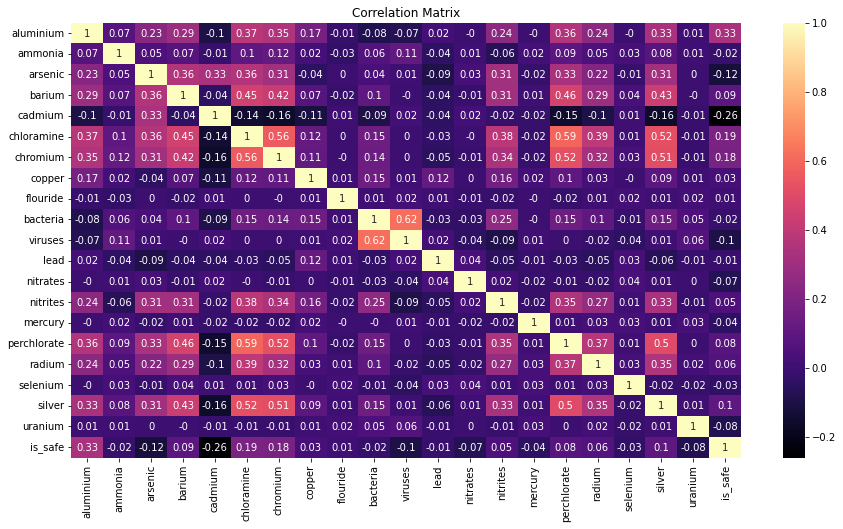

In [26]:
# Summary statistics
display(df_water.describe())

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))
# Correlation matrix
sns.heatmap(df_water.corr().round(decimals = 2), annot = True, cmap = "magma").set(title = "Correlation Matrix")
plt.show()

The dataset contains **7996 observations**. Similarly to the previous dataset, each of the variables has **different ranges of values** as observable from the summary statistics. 

The heatmap above highlights the correlations between each pair of variable in the dataset. Some of the features exhibit a **positive correlation**, such as chromium and chloramine, perchlorate and chloramine, viruses and bacteria. What is interesting to observe however is the set of relationships related to the "is_safe" variable. We can observe a **weak positive relationship** with aluminium, chloramine and chromium. 

- Create a pairplot including the columns "arsenic", "cadmium", "chromium", "copper", "bacteria", "viruses", "lead", "nitrates", "mercury"; and color by the class "is_safe" **1 points**

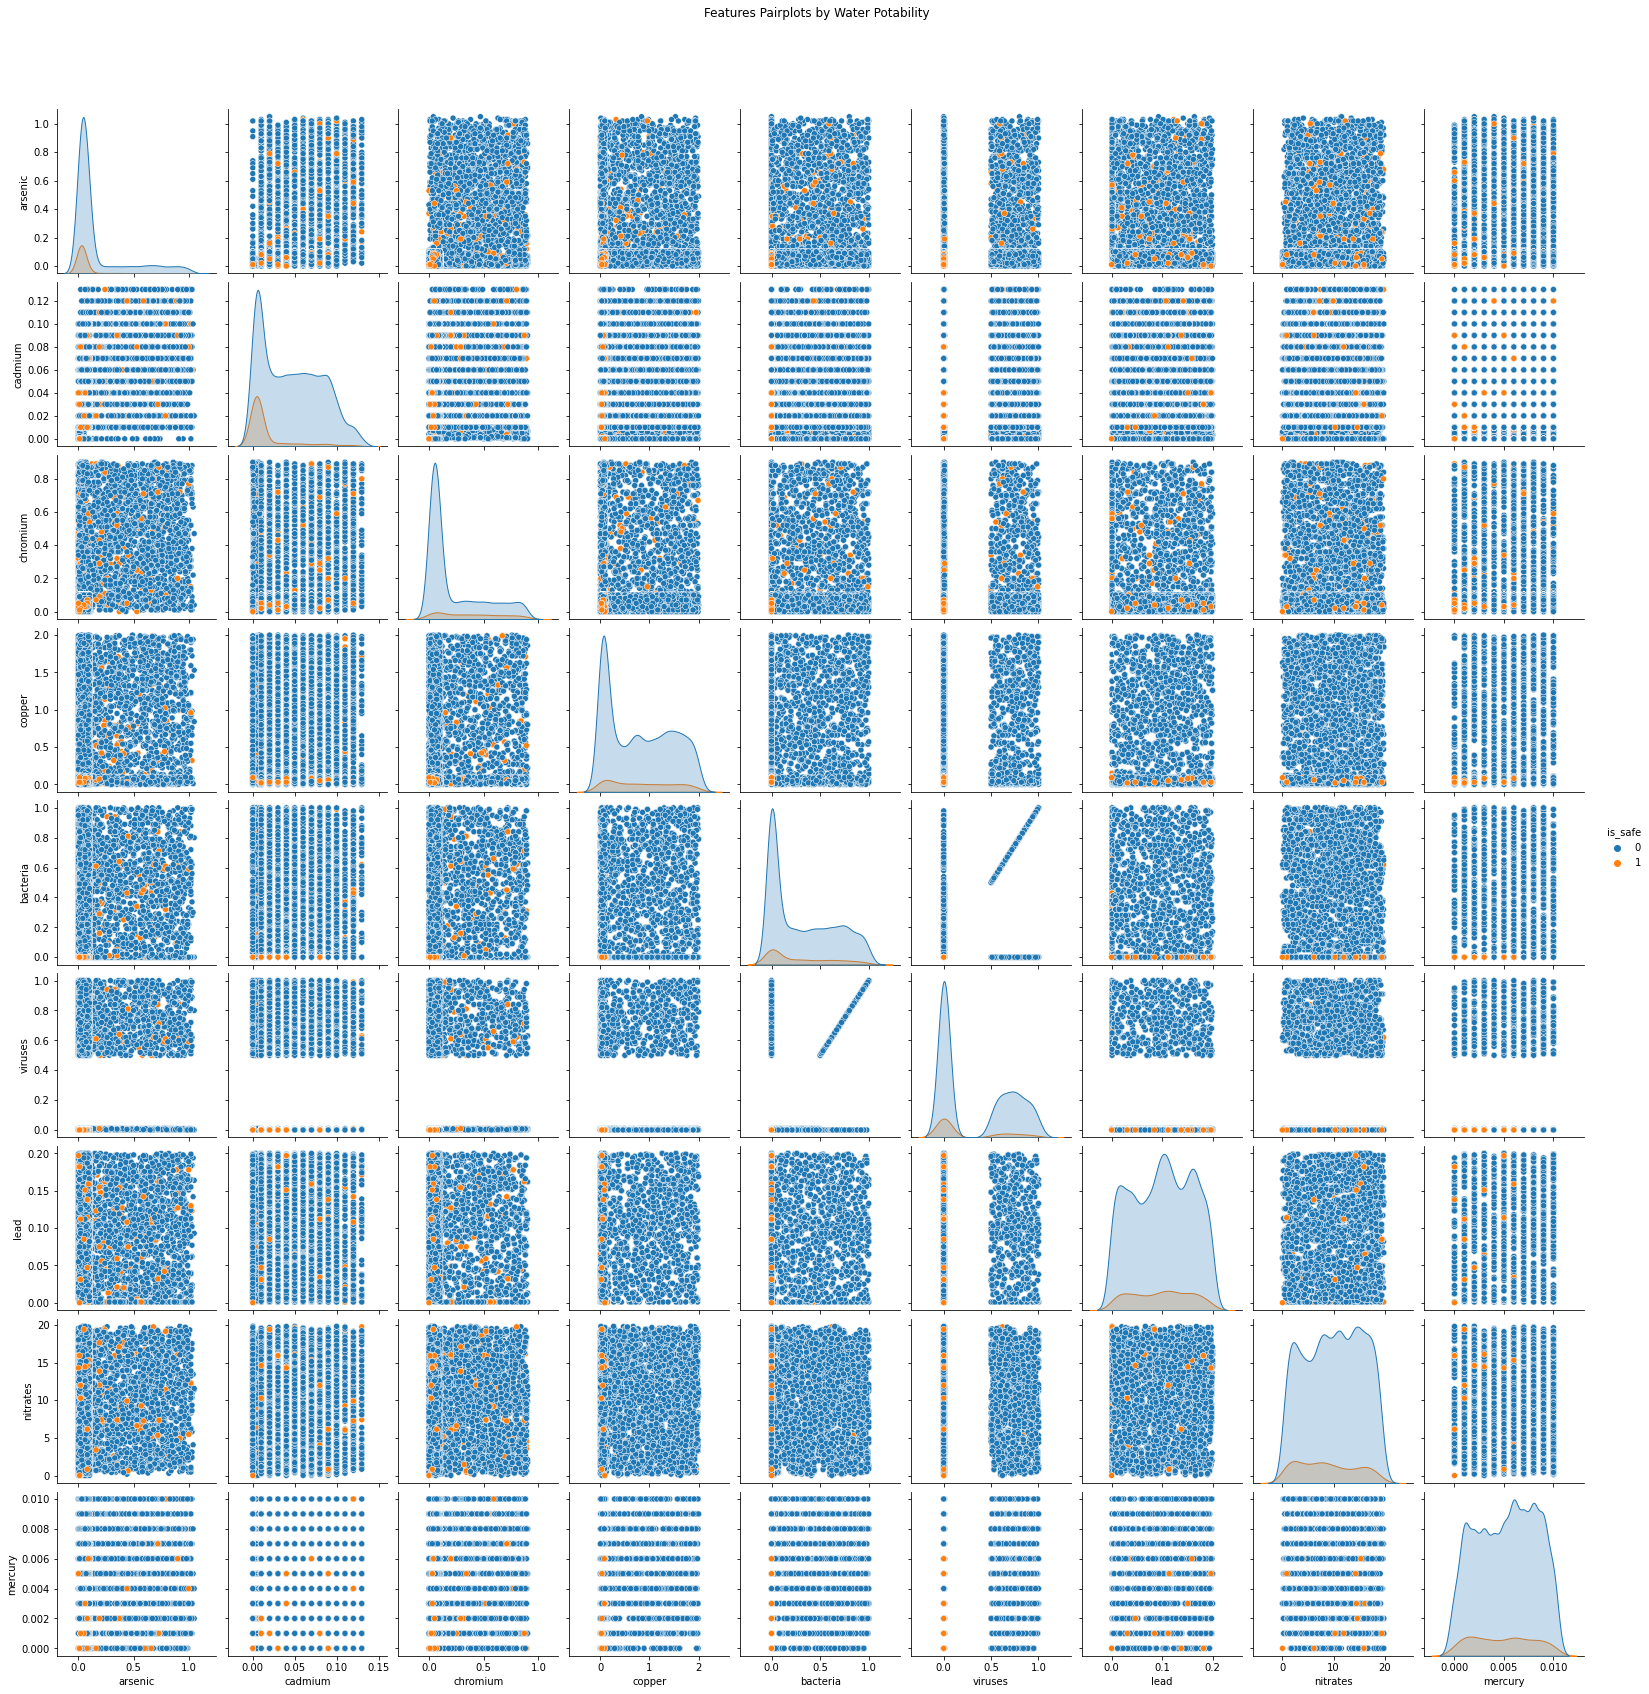

In [27]:
# Pairplot
sns.pairplot(df_water, vars = ["arsenic", "cadmium", "chromium", "copper", "bacteria", 
                          "viruses", "lead", "nitrates", "mercury"], hue = "is_safe")

# Add title
title = plt.suptitle("Features Pairplots by Water Potability")
title.set_position([.5, 1.05])  # Set the position of the title

plt.show()

- Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

### Question 7: Preprocessing

We will try to predict the class "is_safe", using all the other features.

- Extract your features and outcome. How many observations do we have of class 0 and of class 1? **1 point**

These are the number of observations per class:
 0    7084
1     912
Name: is_safe, dtype: int64



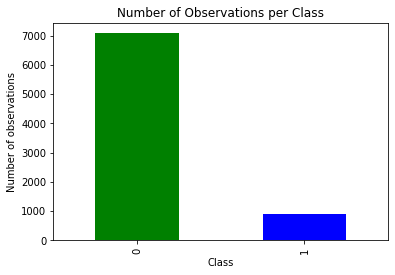

In [28]:
# Define features and target variable
X = df_water.drop(columns = "is_safe")
y = df_water["is_safe"]

# Count the number of observations corresponding to each class
print("These are the number of observations per class:\n", y.value_counts())
print()

# Visual representation
y.value_counts().plot.bar(color=["green", "blue"], grid = False)
plt.ylabel("Number of observations")
plt.xlabel("Class")
plt.title("Number of Observations per Class");

- Split between training and test set **1 point**

*Note*: Use as parameters for splitting: `test_size=0.2`, `random_state=39`, `shuffle=True`

In [29]:
# Split dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39, shuffle = True)

- Rescale your features using `StandardScaler` **1 point**

In [30]:
# Define the scaler
scaler = StandardScaler()

# Fit the scaler and transform the train and the test set 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Question 8: Logistic Regression

- Build and train a logistic regression classifier, using as parameters `penalty='l2'`, `solver='lbfgs'`, `max_iter=1000` **1 point**

In [31]:
# Set up the Logistic regression model
model_log_reg = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter = 1000)

# Fit the model
model_log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- Compute the accuracy on the training and test set. Compare it to the default rate. **1 point** 

In [32]:
# Make predictions 
y_pred = model_log_reg.predict(X_test)

# Default rate 
print("Default rate: {:.3f}".format(len(y[y==0])/len(y)))

# Accuracy on the test set
acc_test = model_log_reg.score(X_test, y_test)
print("Accuracy of Logistic regression classifier on test set: {:.3f}".format(acc_test))

# Accuracy on the training set
acc_train = model_log_reg.score(X_train, y_train)
print("Accuracy of Logistic regression classifier on training set: {:.3f}".format(acc_train))

Default rate: 0.886
Accuracy of Logistic regression classifier on test set: 0.911
Accuracy of Logistic regression classifier on training set: 0.906


As observable in the output above, the **default rate** is equal to **0.886**, computed as the division of the lenght of the most frequent class in the dataset (i.e., 0) over the total number of observations. 

The accuracy of the Logistic regression classifier on the test set **performs better** than the default rate (0.911 against 0.886), which means that the Logistic regression classifier is able to correctly predict the outcome variable with a higher accuracy than simply relying on the most frequent class in the dataset. 

Since the accuracy on the accuracy on the test and training set are almost the same, it suggests that the **model is not overfitting to the training data**. This means that the model is able to generalize well to new, unseen data.

- Plot a heatmap of the confusion matrix. Class 1 is the positive class. How many false positive did we obtain? **1 point**

Text(0.5, 1.0, 'Confusion Matrix')

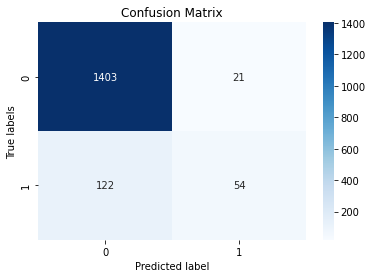

In [33]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = "Blues", fmt='.4g')
plt.xlabel("Predicted label")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

The classifier is good at predicting the **negative class**, that indeed belongs to the negative class. However, given the context of this model what is vital to reduce is the number of **false positives**, which means those waters that are predicted to be drinkable but istead they are not. In our case, the false positives are equal to **21**.

- What is the precision, recall, and f1 score of class 1? Interpret the result. **1 point**

In [34]:
# Precision
prec = precision_score(y_test, y_pred)
print("The precision for class 1 is: {:0.3f}".format(prec))
# Recall
recall = recall_score(y_test, y_pred)
print("The recall for class 1 is: {:0.3f}".format(recall))
# F1
f1 = f1_score(y_test, y_pred)
print("The F1 Score for class 1 is: {:0.3f}".format(f1))

The precision for class 1 is: 0.720
The recall for class 1 is: 0.307
The F1 Score for class 1 is: 0.430


Since we would like to reduce the number of false positives, the most relevant metric to look at is the **precision** of the classifier, defined as the proportion of positive predictions that are actually true positives. With a value of **0.72**, the precision for Class 1 (i.e., Safe Water) indicates that out of all the predictions that the classifier has made for Class 1, 72% of them are actually true positives. 

In terms of **recall** the classifier was able to correctly identify **30.7%** of actual positive instances. This lower number may be due to the imbalance of the outcome variable. The model tends in fact to favor the more frequent class in its predictions.

The **F1 score** of **0.430** reflects the tradeoff between the two previous metrics, as it takes into account both the false positives and the false negatives. Since the F1 score is a useful measure to evaluate the overall performance of a classifier, we will keep track of this metric to compare this model with the next ones.

In [35]:
# Create a DataFrame with statistics of the model
d_results = {"Model":["Logistic Regression"], "Test Accuracy": [acc_test], "Train Accuracy" : [acc_train], 
             "Precision" : [prec], "Recall": [recall], "F1 Score" : [f1]}
df_compare = pd.DataFrame(d_results).round(decimals = 3)
df_compare

Model  Test Accuracy  Train Accuracy  Precision  Recall  \
0  Logistic Regression          0.911           0.906       0.72   0.307   

   F1 Score  
0      0.43

- Build and train a logistic regression classifier with cross-validation, using 5 folds **1 point**

In [36]:
# Set up the Logistic regression model with cross validation
model_cv = LogisticRegressionCV(penalty = "l2", solver = "lbfgs", cv = 5, max_iter = 1000)

# Fit the model
model_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

- Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your model without cross-validation? **1 point**

*Note*: You can, but not have to, create a function to calculate your evaluation metrics since we will perform the same operation later on.

The accuracy on test set is: 0.911
The accuracy on training set is: 0.906
The precision for class 1 is: 0.720
The recall for class 1 is: 0.307
The F1 score for class 1 is: 0.430



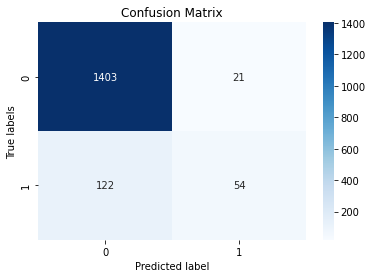

In [37]:
def evaluate_performance(model, X_train, X_test, y_train, y_test, model_name):

  """ This function takes as arguments the model to evaluate, the 
  train and test sets of the features and outcome variable, and 
  a string that indicates the name of the model. The expected output
  is the accuracy on the test and training test, together with 
  the precision, recall, and f1 on Class 1, and the confusion matrix.
  The function returns a dictionary containing the statistics obtained that 
  will be added to the DataFrame that compares models' performances."""
  
  # Accuracy on the test and training set
  model_acc_test = model.score(X_test, y_test)
  model_acc_train = model.score(X_train, y_train)
  print("The accuracy on test set is: {:0.3f}".format(model_acc_test))
  print("The accuracy on training set is: {:0.3f}".format(model_acc_train))

  # Precision, recall and f1 on class 1
  y_pred = model.predict(X_test)
  model_prec = precision_score(y_test, y_pred)
  model_recall = recall_score(y_test, y_pred)
  model_f1 = f1_score(y_test, y_pred)
  print("The precision for class 1 is: {:0.3f}".format(model_prec))
  print("The recall for class 1 is: {:0.3f}".format(model_recall))
  print("The F1 score for class 1 is: {:0.3f}\n".format(model_f1))

  # Confusion matrix
  sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = "Blues", fmt = ".4g")
  plt.xlabel("Predicted label")
  plt.ylabel("True labels")
  plt.title("Confusion Matrix")

  # Return dictionary of statistics
  stats = {"Model" : model_name, 
           "Test Accuracy": model_acc_test,
           "Train Accuracy": model_acc_train,
           "Precision": model_prec,
           "Recall": model_recall,
           "F1 Score": model_f1}

  return stats

new_stats = evaluate_performance(model_cv, X_train, X_test, y_train, y_test, "CV Logistic Regression")

In [38]:
# Update the DataFrame that compares the models
df_compare.loc[len(df_compare)] = new_stats
df_compare.round(decimals = 3)

Model  Test Accuracy  Train Accuracy  Precision  Recall  \
0     Logistic Regression          0.911           0.906       0.72   0.307   
1  CV Logistic Regression          0.911           0.906       0.72   0.307   

   F1 Score  
0      0.43  
1      0.43

Interestingly, both the **confusion matrix** and the other **performance indicators** are the **same** in the Logistic Regression model as in the Cross-validation model. Some reasons why we might observe this phenomenon are explained below:

- **Selection of hyperparameters**: hyperparameters are parameters that are set by the user and that have a significant impact on the performance of the model. In our case, both the logistic regression models define the following hyperparameters: `penalty = "l2"`, `solver = "lbfgs"`, `max_iter = 1000`. Since the same dataset and target variables have been used, it is possible that the hyperparameters chosen are already optimal for this dataset. 

- **Randomness**: as mentioned above, the two models have used the exact same train and test sample of features and outcome variable. If we would have run again the `train_test_split()` command, we would have probably obtained slightly different results. 

It is also worth mentioning that the results obtained are rounded at 3 digits, and therefore very small changes are not observable.

### Question 9: KNN classifier

- Build and train a KNN classifier with parameters `n_neighbors=7`, `p=2`, `weights='uniform'` **1 point**

In [39]:
# Set up the KNN model
model_kNN = KNeighborsClassifier(n_neighbors = 7, p = 2, weights = "uniform")

# Fit the model
model_kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

- Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point**

The accuracy on test set is: 0.919
The accuracy on training set is: 0.932
The precision for class 1 is: 0.774
The recall for class 1 is: 0.369
The F1 score for class 1 is: 0.500



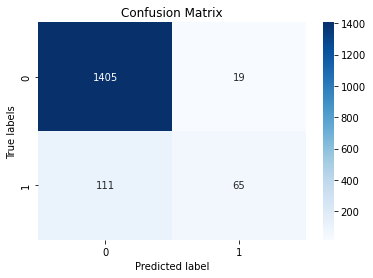

In [40]:
# Call function to obtain model statistics
new_stats = evaluate_performance(model_kNN, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

In [41]:
# Update the DataFrame that compares the models
df_compare.loc[len(df_compare)] = new_stats
df_compare.round(decimals = 3)

Model  Test Accuracy  Train Accuracy  Precision  Recall  \
0     Logistic Regression          0.911           0.906      0.720   0.307   
1  CV Logistic Regression          0.911           0.906      0.720   0.307   
2     K-Nearest Neighbors          0.919           0.932      0.774   0.369   

   F1 Score  
0      0.43  
1      0.43  
2      0.50

At a first glance, the KNN model seems to perform better than the Logistic Regression models. The **accuracy** on the test and train test (**0.919** and **0.932**) are in fact higher than the ones previously found. In spite of this, the KNN model might entail an **overfitting** issue, given the higher value for the train accuracy with respect to the test one. Therefore, compared to the previous models, this classifier may not perform well with new and unseen data. 

An **improvement** in terms of **precision** (from **0.72** to **0.774**) can be observed with respect to the other models. The number of false positives reduces from **21** to **19**.

In addition to the enhancements in precision and false positives, the KNN model has improved in terms of **recall** by almost **0.06 points**. This overall improvement of the model is highlighted by the **F1 score**, which is now equal to **0.5** compared to the previous **0.43**. This indicates that the KNN model is better at balancing precision and recall, and can provide a more accurate evaluation of its overall performance.

- Use `GridSearchCV` to explore different parameters for your model: `n_neighbors` between 1 and 11, `p` between 1 and 3, and `weights` either 'uniform' or 'distance' **1 point**

In [42]:
# Define parameters to test
grid = {"n_neighbors": np.arange(1,12),     # array from 1 to 11, neighbors
        "p": np.arange(1,4),                # array from 1 to 3, distance metrics
        "weights" : ["uniform","distance"]  # weights
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 5)
knn_cv.fit(X_train, y_train)

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score: {:0.2f}".format(knn_cv.best_score_))
print("Test Score: {:0.2f}".format(knn_cv.score(X_test, y_test)))

Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train Score: 0.91
Test Score: 0.92


- For your "optimal" model, compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point** 

The accuracy on test set is: 0.923
The accuracy on training set is: 0.928
The precision for class 1 is: 0.844
The recall for class 1 is: 0.369
The F1 score for class 1 is: 0.514



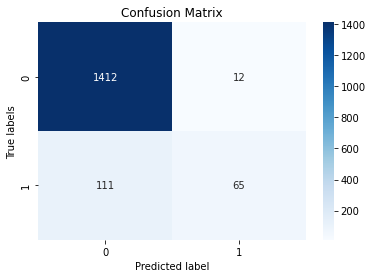

In [43]:
# Set up the optimal KNN model  
model_knn = KNeighborsClassifier(n_neighbors = 9, p = 2, weights = "uniform")

# Fit the model
model_knn.fit(X_train, y_train)

# Call function to obtain model statistics
new_stats = evaluate_performance(model_knn, X_train, X_test, y_train, y_test, "Optimal KNN")

In [44]:
# Update the DataFrame that compares the models
df_compare.loc[len(df_compare)] = new_stats
df_compare.round(decimals = 3)

Model  Test Accuracy  Train Accuracy  Precision  Recall  \
0     Logistic Regression          0.911           0.906      0.720   0.307   
1  CV Logistic Regression          0.911           0.906      0.720   0.307   
2     K-Nearest Neighbors          0.919           0.932      0.774   0.369   
3             Optimal KNN          0.923           0.928      0.844   0.369   

   F1 Score  
0     0.430  
1     0.430  
2     0.500  
3     0.514

The KNN model with optimal parameters shows some improvement in terms of addressing the overfitting issue compared to the previous model. While the **test accuracy** is slightly higher at **0.923**, the **train accuracy** has **reduced** to **0.928** from the previous 0.932. This suggests that the model may be **less prone to overfitting** and could perform better on new and unseen data. This can be due to the increased number of **neighbours** (from 7 to 9), which makes the decision boundary smoother and thus simplifies the model avoiding overfitting issues. 

Compared to the previous models, the optimal KNN model exhibits **higher precision** and **F1 score**. The precision has improved from **0.774** of the previous KNN model to **0.844**, which means that there are fewer Class 0 classified as Class 1 (12 against 19). The F1 score has also increased from **0.5** to **0.514**, which indicates a better balance between precision and recall. 

Instead, the **recall value** has **remained the same** as in the previous KNN model, which suggests that the optimal KNN model is not better at classifying true positives than the previous classifier.

### Question 10: Decision Trees

- Build and train a Decision Tree with parameters `criterion = 'gini'`, `max_depth = 3` **1 point**

In [45]:
# Set up the Decision Tree model
model_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 3)

# Fit model
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

- Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point**

The accuracy on test set is: 0.942
The accuracy on training set is: 0.941
The precision for class 1 is: 0.911
The recall for class 1 is: 0.523
The F1 score for class 1 is: 0.664



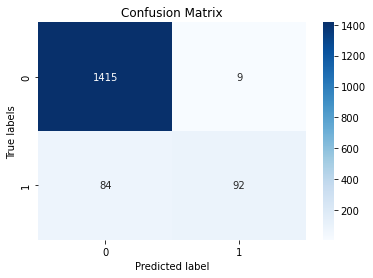

In [46]:
# Recall the function to obtain statistics
new_stats = evaluate_performance(model_tree, X_train, X_test, y_train, y_test, "Decision Tree")

In [47]:
# Update the DataFrame that compares the models
df_compare.loc[len(df_compare)] = new_stats
df_compare.round(decimals = 3)

Model  Test Accuracy  Train Accuracy  Precision  Recall  \
0     Logistic Regression          0.911           0.906      0.720   0.307   
1  CV Logistic Regression          0.911           0.906      0.720   0.307   
2     K-Nearest Neighbors          0.919           0.932      0.774   0.369   
3             Optimal KNN          0.923           0.928      0.844   0.369   
4           Decision Tree          0.942           0.941      0.911   0.523   

   F1 Score  
0     0.430  
1     0.430  
2     0.500  
3     0.514  
4     0.664

Compared to the other models, the **Decision Tree model** performs significantly **better** in terms of **test accuracy**, with an accuracy of **0.942**, while also having a relatively high **train accuracy** of **0.941**. This model has good generalization performance and is less likely to overfit compared to the KNN model.

The **precision** of the decision tree model is also higher than that of the other models, with a value of **0.911**, meaning that the model is better at correctly classifying unsafe water samples. In fact, the number of **false positives** diminishes from **12** to **9**, while the number of **true positives** increases from **65** to **92**. 

A significant increase is also observable in terms of **recall** and **F1 score** (from 0.369	to 0.523 and from 0.514 to 0.664, respectively), indicating that the Decision Tree classifier has the best balance between precision and recall.

- Visualize your Decision Tree **1 point**

<Figure size 504x504 with 0 Axes>

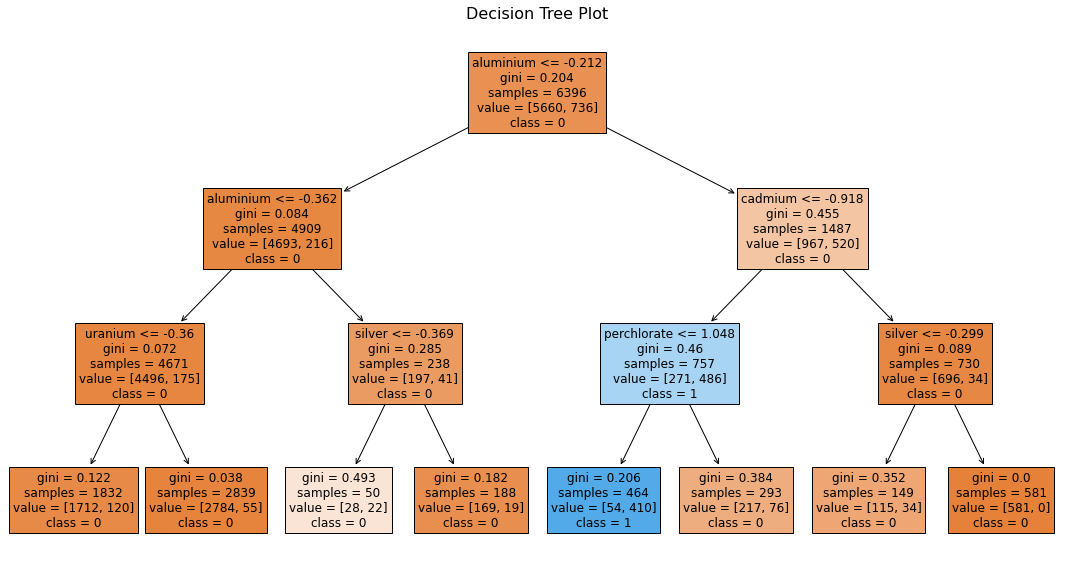

In [48]:
plt.figure(figsize=(7,7))

# Increase the space between each leaf
fig, axe = plt.subplots(figsize=(19,10))

# Plot the model we have previously built 
plot_tree(model_tree, filled = True, feature_names = (X.columns), fontsize = 12, class_names = ["0", "1"])

plt.title("Decision Tree Plot", fontsize = 16)
plt.show()

- Use `GridSearchCV` to explore different parameters for your model: `criterion` either 'gini' or 'entropy' and `max_depth` between 1 and 7 **1 point**

In [49]:
# Define parameters to test
grid_tree = {"criterion":["gini","entropy"] ,     # criteria
           "max_depth":np.arange(1,8)}            # array from 1 to 7 max_depth  

# Define and fit model
dec_tree = DecisionTreeClassifier()
dec_tree_cv = GridSearchCV(dec_tree, grid_tree, cv = 5)
dec_tree_cv.fit(X_train, y_train)

# Print results
print("Hyperparameters:", dec_tree_cv.best_params_)
print("Best model:", dec_tree_cv.best_estimator_)
print("Train Score: {:0.2f}".format(dec_tree_cv.best_score_))
print("Test Score: {:0.2f}".format(dec_tree_cv.score(X_test, y_test)))

Hyperparameters: {'criterion': 'entropy', 'max_depth': 7}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=7)
Train Score: 0.96
Test Score: 0.96


- For your "optimal" model, compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point** 

The accuracy on test set is: 0.966
The accuracy on training set is: 0.978
The precision for class 1 is: 0.923
The recall for class 1 is: 0.750
The F1 score for class 1 is: 0.828



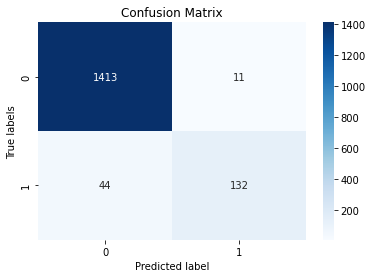

In [50]:
# Define and fit model
dec_tree_final = DecisionTreeClassifier(criterion = "entropy", max_depth = 7)
dec_tree_final.fit(X_train, y_train)

# Call function to obtain statistics
new_stats = evaluate_performance(dec_tree_final, X_train, X_test, y_train, y_test, "Optimal Decision Tree")

In [51]:
# Update the DataFrame that compares the models
df_compare.loc[len(df_compare)] = new_stats
df_compare.round(decimals = 3)

Model  Test Accuracy  Train Accuracy  Precision  Recall  \
0     Logistic Regression          0.911           0.906      0.720   0.307   
1  CV Logistic Regression          0.911           0.906      0.720   0.307   
2     K-Nearest Neighbors          0.919           0.932      0.774   0.369   
3             Optimal KNN          0.923           0.928      0.844   0.369   
4           Decision Tree          0.942           0.941      0.911   0.523   
5   Optimal Decision Tree          0.966           0.978      0.923   0.750   

   F1 Score  
0     0.430  
1     0.430  
2     0.500  
3     0.514  
4     0.664  
5     0.828

All performance metrics show that the **Optimal Decision Tree** model **performs better** than the previous models. While this model provides the highest train accuracy (0.978), the overfitting tendency is less in this model, as there is a smaller difference with the test accuracy compared to other models. 

As opposed to the previous Decision Tree model, the Optimal Decision Tree model has a significantly **higher test accuracy**, and **recall**, while having a similar **precision** and **F1 score**. This indicates that the Optimal Decision Tree model is better at correctly identifying both Class 0 and Class 1 observations, while having a similar false positive rate to the Decision Tree model. In fact, the improvement in precision is driven by the highest number of correctly identified true positives (**132** compared to **92**), while the false positives increase by **2**. 

Given these considerations, the Optimal Decision Tree seems to be the best classifier, as it provides the highester performance in terms of test and train accuracy, precision, recall and F1 score, and it is less prone to overfitting compared to the other models. 

However, it is also important to evaluate the **specific context** of the classification task. In fact, the priority should be the one of minimizing the risk derived by false predictions of safe waters, which can lead to serious consequences. In this perspective, the **previous Decision Tree model** seems the best, as it minimizes the number of false positives to 9 at the expenses of the correctly classified safe waters. 


(Please note that the confusion matrix of the optimal Decision Tree changes a bit every time we run the code)

Congrats, you are done with the assignment!